# Minicurso: Tratamento de Dados com Python 🐍
Este minicurso foi criado para ensinar como identificar e tratar problemas reais em bases de dados utilizando `pandas`, `matplotlib` e `seaborn`.

## Bloco 1: Diagnóstico Inicial 🔍

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Carregar a base com erros
df = pd.read_csv('../docs/base_sintetica_com_erros.csv')
df.head()

,ano,sigla_uf,id_municipio,ibc,cobertura_pop_4g5g,fibra,densidade_smp,hhi_smp,densidade_scm,hhi_scm,adensamento_estacoes,coluna_lixo


In [2]:
# Diagnóstico inicial
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22291 entries, 0 to 22290
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ano                   22288 non-null  float64
 1   sigla_uf              22288 non-null  object 
 2   id_municipio          22288 non-null  float64
 3   ibc                   22288 non-null  object 
 4   cobertura_pop_4g5g    22277 non-null  object 
 5   fibra                 22267 non-null  object 
 6   densidade_smp         22288 non-null  float64
 7   hhi_smp               22288 non-null  object 
 8   densidade_scm         22282 non-null  float64
 9   hhi_scm               22288 non-null  object 
 10  adensamento_estacoes  22288 non-null  float64
 11  coluna_lixo           22288 non-null  object 
dtypes: float64(5), object(7)
memory usage: 2.0+ MB


## Bloco 2: Valores Faltantes ❌

In [3]:
# Ver colunas com valores faltantes
df.isnull().sum()

ano                      3
sigla_uf                 3
id_municipio             3
ibc                      3
cobertura_pop_4g5g      14
fibra                   24
densidade_smp            3
hhi_smp                  3
densidade_scm            9
hhi_scm                  3
adensamento_estacoes     3
coluna_lixo              3
dtype: int64

In [4]:
# Exemplo de tratamento: preenchendo com a mediana
# df['fibra'] = pd.to_numeric(df['fibra'], errors='coerce')
# df['fibra'].fillna(df['fibra'].median(), inplace=True)

In [5]:
# Exemplo de conversão de tipo
# 'fibra' deve ser numérica
df['fibra'] = pd.to_numeric(df['fibra'], errors='coerce')  # transforma inválidos em NaN

# Verificando novamente valores faltantes
df['fibra'].isna().sum()

np.int64(27)

## Bloco 3: Tipos Errados 🔤

In [6]:
# Função para identificar valores não numéricos
def valores_texto(coluna):
    return df[coluna][pd.to_numeric(df[coluna], errors="coerce").isna()].unique()

# Listar textos em hhi_smp e hhi_scm
valores_smp = valores_texto("hhi_smp")
valores_scm = valores_texto("hhi_scm")

print("", valores_smp)
print("", valores_scm)

 ['cinquenta e um' nan]
 ['cinquenta e nove' nan]


In [7]:
# Corrigir vírgulas, porcentagens e texto
df['ibc'] = df['ibc'].astype(str).str.replace('%','').str.replace(',','.')
df['ibc'] = pd.to_numeric(df['ibc'], errors='coerce')

# Dicionário de números por extenso para número
extenso_para_numero = {
    'cinquenta e um': 51,
    'cinquenta e dois': 52,
    'cinquenta e três': 53,
    'cinquenta e quatro': 54,
    'cinquenta e cinco': 55,
    'cinquenta e seis': 56,
    'cinquenta e sete': 57,
    'cinquenta e oito': 58,
    'cinquenta e nove': 59,
    'sessenta': 60,
    'sessenta e um': 61,
    'sessenta e dois': 62,
    'sessenta e três': 63,
    'sessenta e quatro': 64,
    'sessenta e cinco': 65,
    'setenta': 70,
    'setenta e um': 71,
    'setenta e dois': 72,
}

# Função para converter valores por extenso
def converter_extenso(valor):
    if isinstance(valor, str):
        valor = valor.strip().lower()
        return extenso_para_numero.get(valor, pd.NA)
    return valor

# Aplicar nas colunas de interesse
df["hhi_smp"] = df["hhi_smp"].apply(converter_extenso).fillna(df["hhi_smp"])
df["hhi_scm"] = df["hhi_scm"].apply(converter_extenso).fillna(df["hhi_scm"])

# Converter para numérico
df["hhi_smp"] = pd.to_numeric(df["hhi_smp"], errors="coerce")
df["hhi_scm"] = pd.to_numeric(df["hhi_scm"], errors="coerce")

print(df.head())

      ano sigla_uf  id_municipio    ibc cobertura_pop_4g5g  fibra  \
0  2024.0       RO     1100296.0  49.92            62.9831  100.0   
1  2024.0       AC     1200351.0  16.28             30.347    NaN   
2  2024.0       AM     1300839.0  29.17            50.9133   50.0   
3  2024.0       AM     1302207.0  20.06             53.331    0.0   
4  2024.0       PA     1501204.0  34.08              52.82  100.0   

   densidade_smp  hhi_smp  densidade_scm  hhi_scm  adensamento_estacoes  \
0          44.00     51.0          23.87     47.0                 25.39   
1          36.72     16.0           8.04     59.0                  8.36   
2          26.62      7.0           0.65     71.0                 17.47   
3          36.33     36.0           5.85     19.0                 13.45   
4          20.46     15.0           2.85     52.0                  6.26   

  coluna_lixo  
0         ---  
1         ---  
2         ---  
3         ---  
4         ---  


## Bloco 4: Inconsistências Textuais ✍️

In [8]:
# Padronizar siglas de estado
df['sigla_uf'] = df['sigla_uf'].astype(str).str.strip().str.upper()
df['sigla_uf'].value_counts()
df.head(15)

,ano,sigla_uf,id_municipio,ibc,cobertura_pop_4g5g,fibra,densidade_smp,hhi_smp,densidade_scm,hhi_scm,adensamento_estacoes,coluna_lixo
0,2024.0,RO,1100296.0,49.92,62.9831,100.0,44.00,51.0,23.87,47.0,25.39,---
1,2024.0,AC,1200351.0,16.28,30.347,NaN,36.72,16.0,8.04,59.0,8.36,---
2,2024.0,AM,1300839.0,29.17,50.9133,50.0,26.62,7.0,0.65,71.0,17.47,---
3,2024.0,AM,1302207.0,20.06,53.331,0.0,36.33,36.0,5.85,19.0,13.45,---
4,2024.0,PA,1501204.0,34.08,52.82,100.0,20.46,15.0,2.85,52.0,6.26,---
5,2024.0,SP,1505908.0,20.54,44.8193,0.0,32.96,29.0,7.69,72.0,5.72,---
6,2024.0,SP,1707702.0,33.71,58.2097,50.0,49.99,9.0,1.85,70.0,19.17,---
7,2024.0,SÃO PAULO,1711506.0,45.29,50.8875,100.0,41.38,11.0,12.93,43.0,58.77,---
8,2024.0,SÃO PAULO,1717008.0,35.01,68.5485,50.0,45.65,2.0,2.88,70.0,21.76,---
9,2024.0,MA,2101731.0,40.34,66.4865,100.0,30.83,2.0,6.40,41.0,17.21,---


In [9]:
df['sigla_uf'] = df['sigla_uf'].astype(str).str.strip().str.upper()

# Corrigir nomes escritos por extenso
df['sigla_uf'] = df['sigla_uf'].replace({
    'SÃO PAULO': 'SP',
    'SAO PAULO': 'SP',
    'SÃO PAULO ': 'SP',
    'SÃO  PAULO': 'SP'
})

In [10]:
# converter todas as colunas numéricas para int quando possível
for col in df.select_dtypes(include="float"):
    df[col] = df[col].apply(lambda x: int(x) if x.is_integer() else x)

## Bloco 5: Duplicatas 🔁 e Linhas Vazias

In [11]:
# Remover duplicatas exatas
df = df.drop_duplicates()
# Remover linhas totalmente vazias
df = df.dropna(how='all')
# Remover coluna inútil
df = df.drop(columns=['coluna_lixo'])

## Bloco 6: Outliers 🚨 e Valores Inválidos

In [12]:
# Remover valores inválidos e outliers em cobertura
df['cobertura_pop_4g5g'] = pd.to_numeric(df['cobertura_pop_4g5g'], errors='coerce')
df = df[df['cobertura_pop_4g5g'] <= 100]
df = df[df['densidade_smp'] >= 0]

## Bloco 7: Comparações Visuais 📊

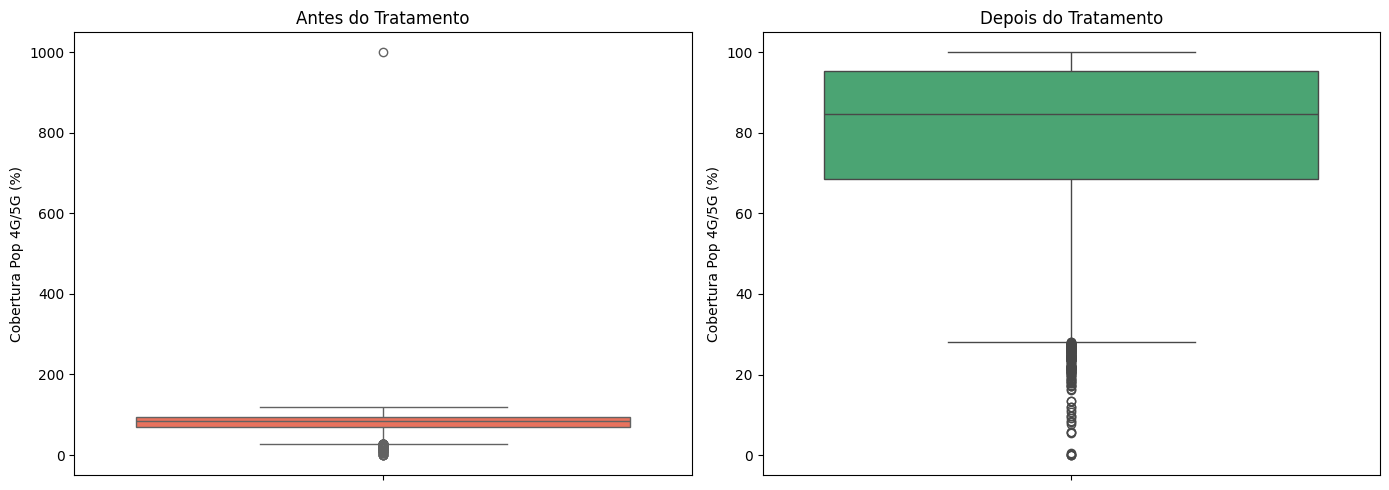

In [13]:
# Converter antes para evitar problema com texto
raw = pd.read_csv('base_sintetica_com_erros.csv')
raw['cobertura_pop_4g5g'] = pd.to_numeric(raw['cobertura_pop_4g5g'], errors='coerce')

# Boxplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(y=raw['cobertura_pop_4g5g'], ax=axs[0], color='tomato')
sns.boxplot(y=df['cobertura_pop_4g5g'], ax=axs[1], color='mediumseagreen')

axs[0].set_title('Antes do Tratamento')
axs[1].set_title('Depois do Tratamento')

axs[0].set_ylabel('Cobertura Pop 4G/5G (%)')
axs[1].set_ylabel('Cobertura Pop 4G/5G (%)')

plt.tight_layout()
plt.savefig('comparacao_boxplot.png')
plt.show()


## Bloco Final: Personalização e Salvamento de Gráficos 🎨

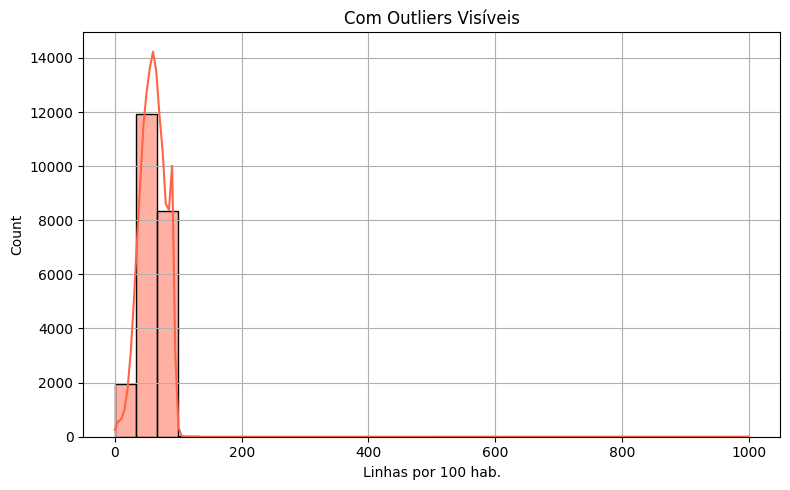

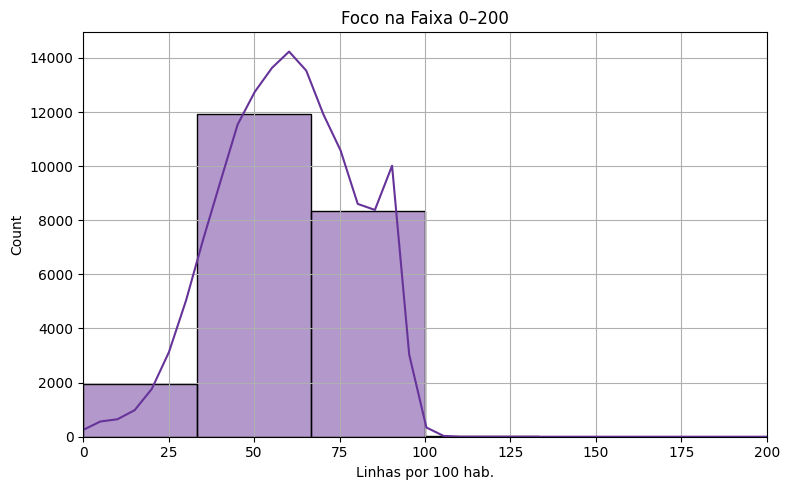

In [14]:
# Sem limite (mostra com outliers)
plt.figure(figsize=(8,5))
sns.histplot(df['densidade_smp'], bins=30, kde=True, color='tomato')
plt.title('Com Outliers Visíveis')
plt.xlabel('Linhas por 100 hab.')
plt.grid(True)
plt.tight_layout()
plt.show()

# Com limite (foco nos dados principais)
plt.figure(figsize=(8,5))
sns.histplot(df['densidade_smp'], bins=30, kde=True, color='rebeccapurple')
plt.title('Foco na Faixa 0–200')
plt.xlabel('Linhas por 100 hab.')
plt.grid(True)
plt.xlim(0, 200)
plt.tight_layout()
plt.show()


**Paletas de cores Seaborn:**
[https://seaborn.pydata.org/tutorial/color_palettes.html](https://seaborn.pydata.org/tutorial/color_palettes.html)

**Parabéns, você limpou a base! 🧼🚀**

In [15]:
df.to_csv("base_tratada.csv", index=False)
print("Base tratada salva com sucesso como 'base_tratada.csv'")

Base tratada salva com sucesso como 'base_tratada.csv'
